# Exploratory Data Analsysis

In [4]:
import pandas as pd
pd.options.display.max_columns = 999

In [5]:
df = pd.read_csv('traffic.zip', parse_dates={'timestamp':[0,1]}) #look up time zones (UTC)
df.head(10)

,timestamp,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29 15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29 21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29 18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29 00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29 17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN
5,2020-08-29 03:29:00,NaN,NaN,40.682310,-73.844950,POINT (-73.84495 40.68231),WOODHAVEN BOULEVARD,NaN,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,4342721,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
6,2020-08-29 19:30:00,BRONX,10459.0,40.825226,-73.887780,POINT (-73.88778 40.825226),LONGFELLOW AVENUE,EAST 165 STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4343004,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
7,2020-08-29 00:00:00,NaN,NaN,40.800160,-73.935380,POINT (-73.93538 40.80016),2 AVENUE,NaN,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4343342,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
8,2020-08-29 19:50:00,BRONX,10466.0,40.894314,-73.860270,POINT (-73.86027 40.894314),EAST 233 STREET,CARPENTER AVENUE,NaN,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,NaN,NaN,4343030,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN
9,2020-08-29 09:20:00,QUEENS,11385.0,40.706780,-73.908880,POINT (-73.90888 40.70678),NaN,NaN,565 WOODWARD AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4343040,Sedan,NaN,NaN,NaN,NaN


In [3]:
print(df.columns)

Index(['timestamp', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')


In [4]:
df.dtypes

timestamp                        datetime64[ns]
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED                 int64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3            object
CONTRIBUTING FACTOR VEHICLE 4           

<AxesSubplot:>

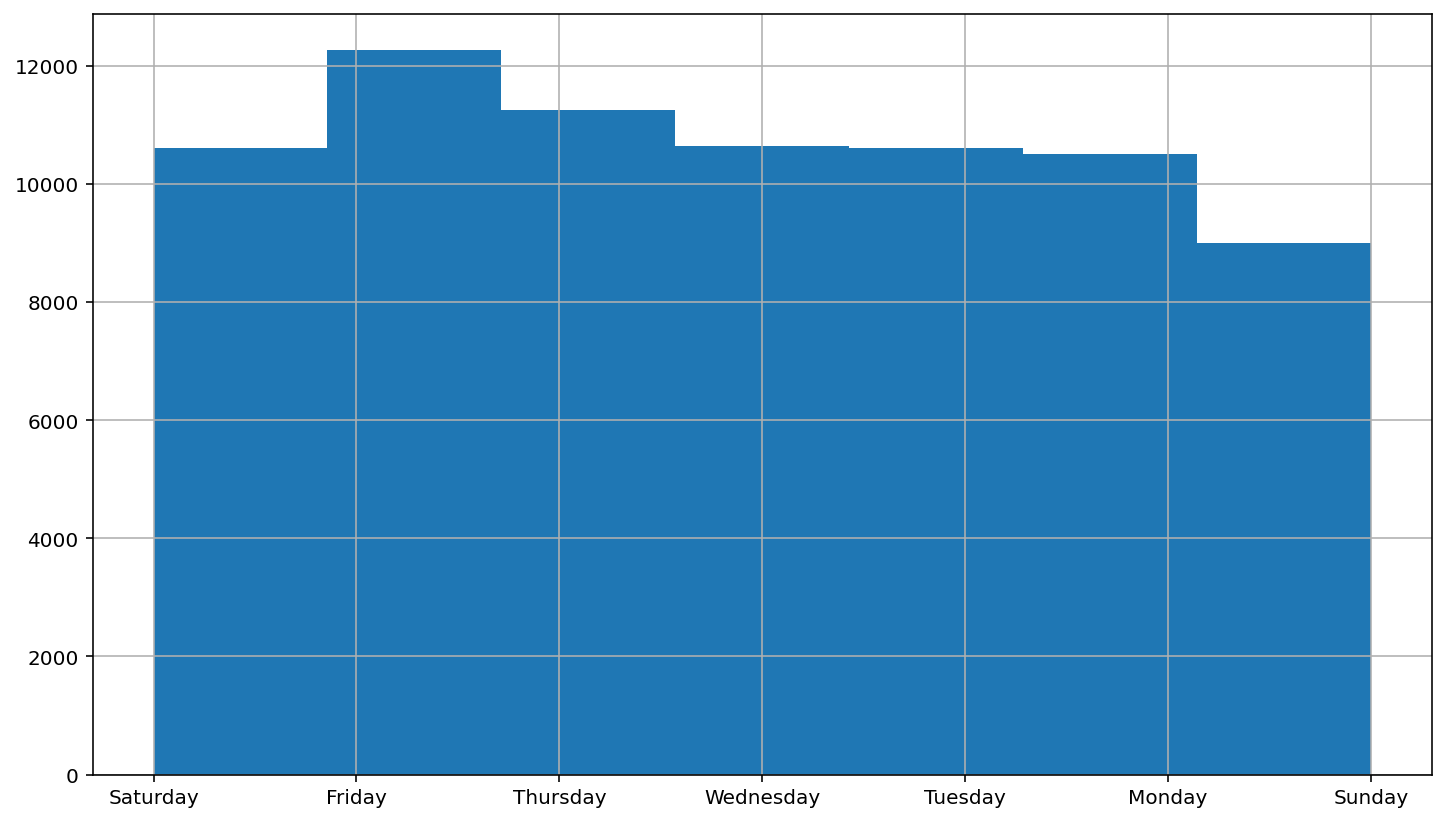

In [5]:
df.timestamp.dt.day_name().hist(bins=7)

/tmp/ipykernel_360/3657816558.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df.timestamp.dt.weekofyear.hist(bins=52)


<AxesSubplot:>

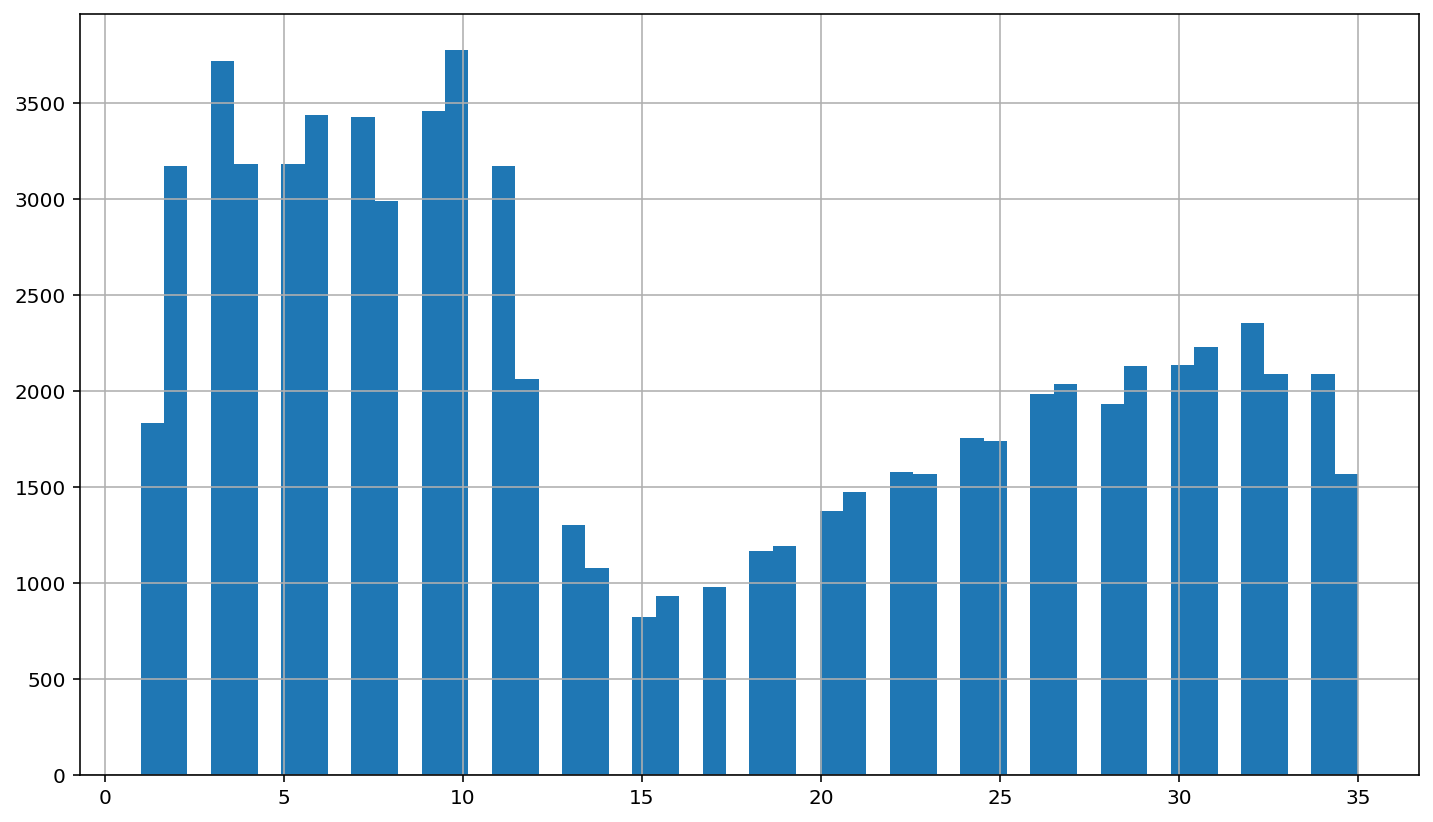

In [6]:
df.timestamp.dt.weekofyear.hist(bins=52)

In [7]:
df.timestamp.describe()

/tmp/ipykernel_360/3977968038.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.timestamp.describe()


count                   74881
unique                  49697
top       2020-01-18 13:30:00
freq                       31
first     2020-01-01 00:00:00
last      2020-08-29 23:50:00
Name: timestamp, dtype: object

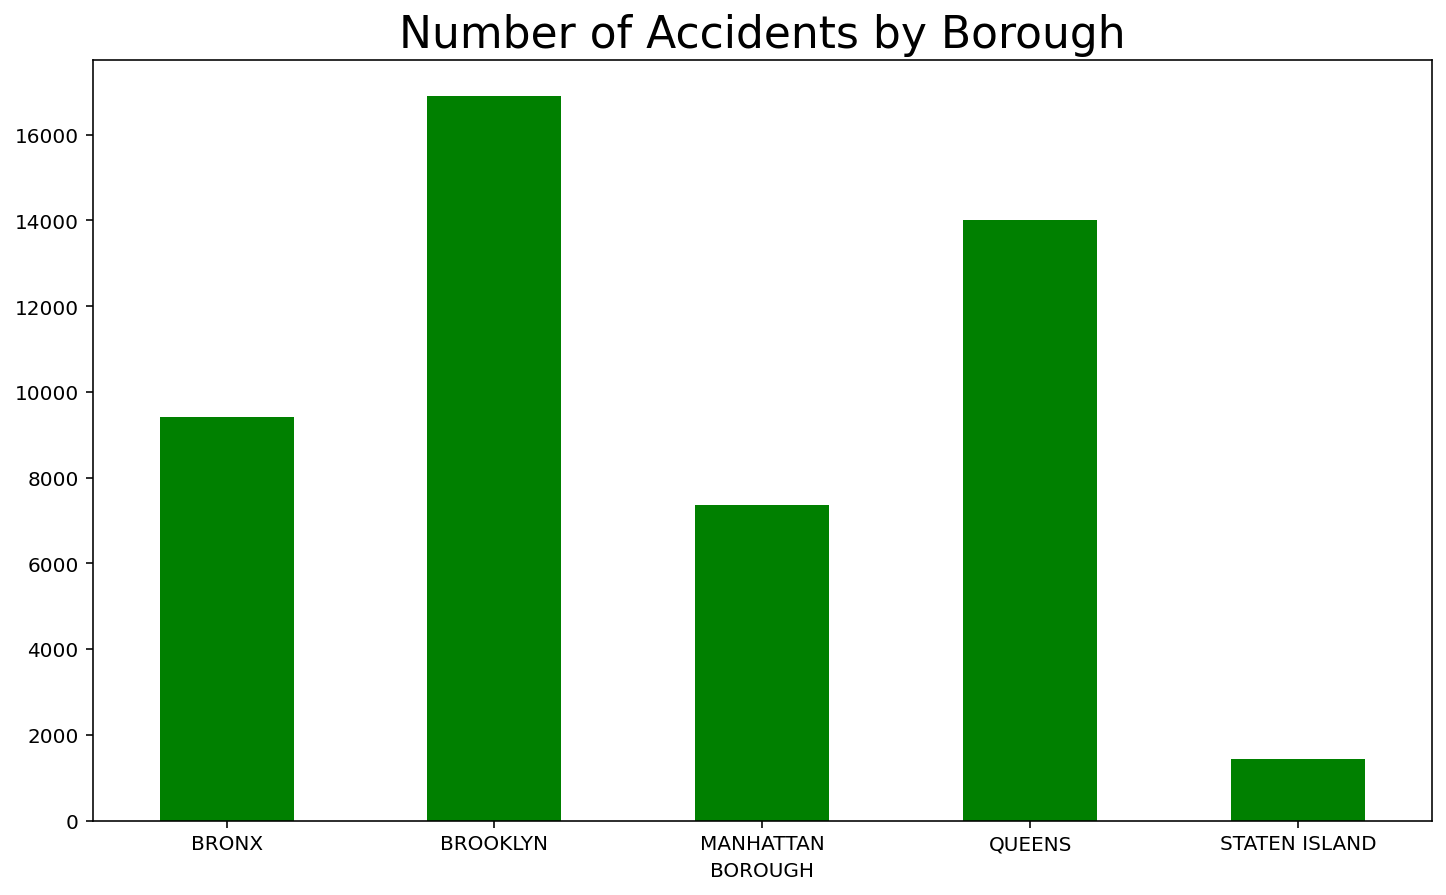

In [8]:
ax = df.groupby(['BOROUGH']).apply(len).plot.bar(color='green')
ax.set_title('Number of Accidents by Borough', fontsize=22)
ax.tick_params(axis='x', rotation=0)

In [9]:
day = df.timestamp.dt.day_of_week
day.name = 'weekday'
df.groupby(['BOROUGH', day]).apply(len).unstack(0)

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
weekday,,,,,
0,1347,2337,993,1995,178
1,1339,2450,1103,1939,221
2,1296,2391,1084,2014,198
3,1448,2557,1184,2011,209
4,1511,2758,1286,2222,250
5,1378,2363,934,2046,205
6,1098,2051,769,1790,185


In [10]:
df.groupby(['BOROUGH', day]).apply(len).unstack(1)

weekday,0,1,2,3,4,5,6
BOROUGH,,,,,,,
BRONX,1347,1339,1296,1448,1511,1378,1098
BROOKLYN,2337,2450,2391,2557,2758,2363,2051
MANHATTAN,993,1103,1084,1184,1286,934,769
QUEENS,1995,1939,2014,2011,2222,2046,1790
STATEN ISLAND,178,221,198,209,250,205,185
